# <span style="color:darkblue"> QTM 151 - Assignment 10 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [1]:
# Write your answer here

print("Anish Nayak")


Anish Nayak


<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [3]:
# Write your answer here

import matplotlib.pyplot as plt
import pandas as pd





<font size = "5">

In this assigment you will work with data on exchange rates, <br>
for two currencies:

- 1 dollar (USD) to chinese yuan (RMB)
- 1 dollar (USD) to japanese yen (JPY).

For this lecture, you will need the material from <br>
Lecture 20 and 22.


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "exchangerates.csv"
- Parse the "date_string" column with ```pd.to_datetime()```
- To get full points, set the "format" option using wildcards as in Lecture 21.


In [13]:
# Write your own code

import pandas as pd

exchange_rates = pd.read_csv('data_raw/exchangerates.csv')

exchange_rates['date'] = pd.to_datetime(exchange_rates['date_string'], format='%Y, %A, %b %d', errors='coerce')


print(exchange_rates[['date_string', 'date']])






                   date_string       date
0         1981, Friday, Jan 02 1981-01-02
1         1981, Monday, Jan 05 1981-01-05
2        1981, Tuesday, Jan 06 1981-01-06
3      1981, Wednesday, Jan 07 1981-01-07
4       1981, Thursday, Jan 08 1981-01-08
...                        ...        ...
11016     2023, Monday, Mar 27 2023-03-27
11017    2023, Tuesday, Mar 28 2023-03-28
11018  2023, Wednesday, Mar 29 2023-03-29
11019   2023, Thursday, Mar 30 2023-03-30
11020     2023, Friday, Mar 31 2023-03-31

[11021 rows x 2 columns]


<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "usd_to_rmb" and "usd_to_jpy" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 USD to RMB" and "1 USD to JPY"

Hint: See Lecture 22 for how to plot multiple columns <br>
Hint: Remember to include the legend names as a list ```[...]```


/var/folders/4h/tq2kcsbs0s9559v2ff08kwp00000gn/T/ipykernel_45113/3250924816.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


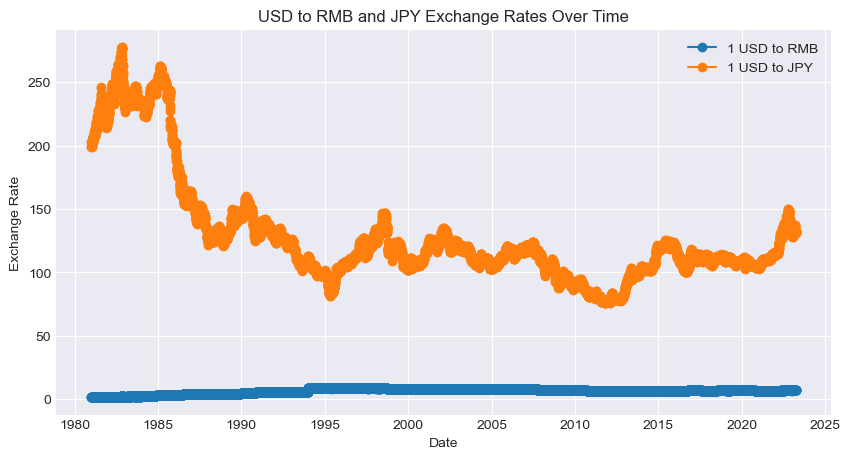

In [19]:
# Write your own code

plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(exchange_rates['date'], exchange_rates['usd_to_rmb'], label='1 USD to RMB', marker='o', linestyle='-')

ax.plot(df['date'], exchange_rates['usd_to_jpy'], label='1 USD to JPY', marker='o', linestyle='-')

ax.set_title('USD to RMB and JPY Exchange Rates Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Exchange Rate')

ax.legend()

plt.show()



<font size = "5">

(c) Flag subset of data and plot

<font size = "3">

- Create a boolean vector (True/False) "bool_cond" which checks whether <br>
"usd_to_jpy" is below 100
- Generate a line plot with the "usd_to_jpy" series, label the axes and the title
- Use the command ```plt.fill_between()``` as in Lecture 22 to create a shaded region <br>
for time periods where "bool_cond" is true.



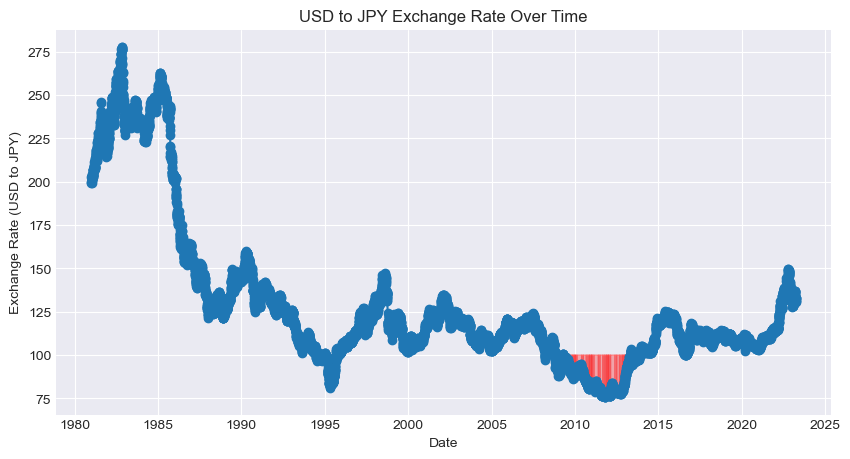

In [21]:
# Write your own code

bool_cond = exchange_rates['usd_to_jpy'] < 100

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(exchange_rates['date'], exchange_rates['usd_to_jpy'], label='1 USD to JPY', marker='o', linestyle='-')

ax.fill_between(exchange_rates['date'], exchange_rates['usd_to_jpy'], 100, where=bool_cond, color='red', alpha=0.3, interpolate=True)

ax.set_title('USD to JPY Exchange Rate Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Exchange Rate (USD to JPY)')
plt.show()



<font size = "5">

(d) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the date column and freq to "m" (month)
- Follow the instructions in Lecture 21 to compute an aggregate dataset <br>
by month which computes the standard deviation of "usd_to_rmb"
- Display the dataset




In [24]:
# Write your own code


month_config = pd.Grouper(key='date', freq='M')

monthly_st_dev = exchange_rates.groupby(month_config)['usd_to_rmb'].std()

print(monthly_st_dev)




date
1981-01-31    0.019149
1981-02-28    0.015432
1981-03-31    0.012636
1981-04-30    0.017154
1981-05-31    0.017583
                ...   
2022-11-30    0.077405
2022-12-31    0.028203
2023-01-31    0.052152
2023-02-28    0.067344
2023-03-31    0.034796
Freq: M, Name: usd_to_rmb, Length: 507, dtype: float64


<font size = "5">

(e) Convert a dataset to long format

<font size = "3">

- Convert the currencies dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["usd_to_rmb","usd_to_jpy"]
```

- Display the dataset

Hint: See Lecture 22 for details on ```pd.melt()```

In [25]:
# Write your own code


long_format_exchange_rates = pd.melt(exchange_rates, id_vars='date', value_vars=['usd_to_rmb', 'usd_to_jpy'], 
                         var_name='type', value_name='exchange_rate')
print(long_format_exchange_rates)



            date        type  exchange_rate
0     1981-01-02  usd_to_rmb         1.5341
1     1981-01-05  usd_to_rmb         1.5418
2     1981-01-06  usd_to_rmb         1.5264
3     1981-01-07  usd_to_rmb         1.5264
4     1981-01-08  usd_to_rmb         1.5264
...          ...         ...            ...
22037 2023-03-27  usd_to_jpy       131.4900
22038 2023-03-28  usd_to_jpy       130.9700
22039 2023-03-29  usd_to_jpy       132.6900
22040 2023-03-30  usd_to_jpy       132.7100
22041 2023-03-31  usd_to_jpy       132.7500

[22042 rows x 3 columns]
